In [1]:
import requests
from pathlib import Path
from typing import Union
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np

from sklearn.linear_model import LogisticRegression

In [ ]:
DATASET_URL = ('https://firebasestorage.googleapis.com/v0/b/hackeps-2019.appspot.com/o/noised-MNIST.npz?alt=media&token=4cee641b-9e31-42c4-b9c8-e771d2eecbad')

In [3]:
def download_file(url: str, 
                  file_path: Union[str, Path]):
  r = requests.get(DATASET_URL, allow_redirects=True)
  Path(file_path).open('wb').write(r.content)

In [4]:
fname = 'noised-MNIST.npz'
download_file(DATASET_URL, fname)

data = np.load(fname)
x, y, x_submission = data.values()

model = LogisticRegression(multi_class='auto',solver='saga',max_iter=5000)

model.fit(x,y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

test_pred = model.predict(x_test)

y_pred = model.predict(x_submission)

f = open("submission.txt","w")

for y in y_pred:
  f.write(str(y) + "\n")

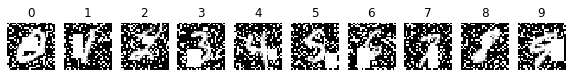

In [6]:
def plot_confusion_matrix(y_true, y_pred,
                          cmap=plt.cm.Blues):

    title = 'Confusion matrix'
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    fig.tight_layout()